In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [11]:
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

## Калибровочный график

In [12]:
with open("calibration.csv") as f:
    cal = pd.read_csv(f)

# cal.n *= 6700
print(*cal.n[:8], sep=' & ', end='\\\\\n')
print(*cal.z[:8], sep=' & ', end='\\\\\n')
print(*cal.n[7:], sep=' & ', end='\\\\\n')
print(*cal.z[7:], sep=' & ', end='\\\\\n')

-7 & -6 & -5 & -4 & -3 & -2 & -1 & 0\\
17 & 48 & 79 & 117 & 153 & 185 & 220 & 261\\
0 & 1 & 2 & 3 & 4 & 5 & 6 & 7\\
261 & 296 & 331 & 364 & 401 & 437 & 472 & 501\\


35.21071428571429 258.79999999999995
0.1673712865658833 0.7231266057282698
[[1.         0.99985316]
 [0.99985316 1.        ]]


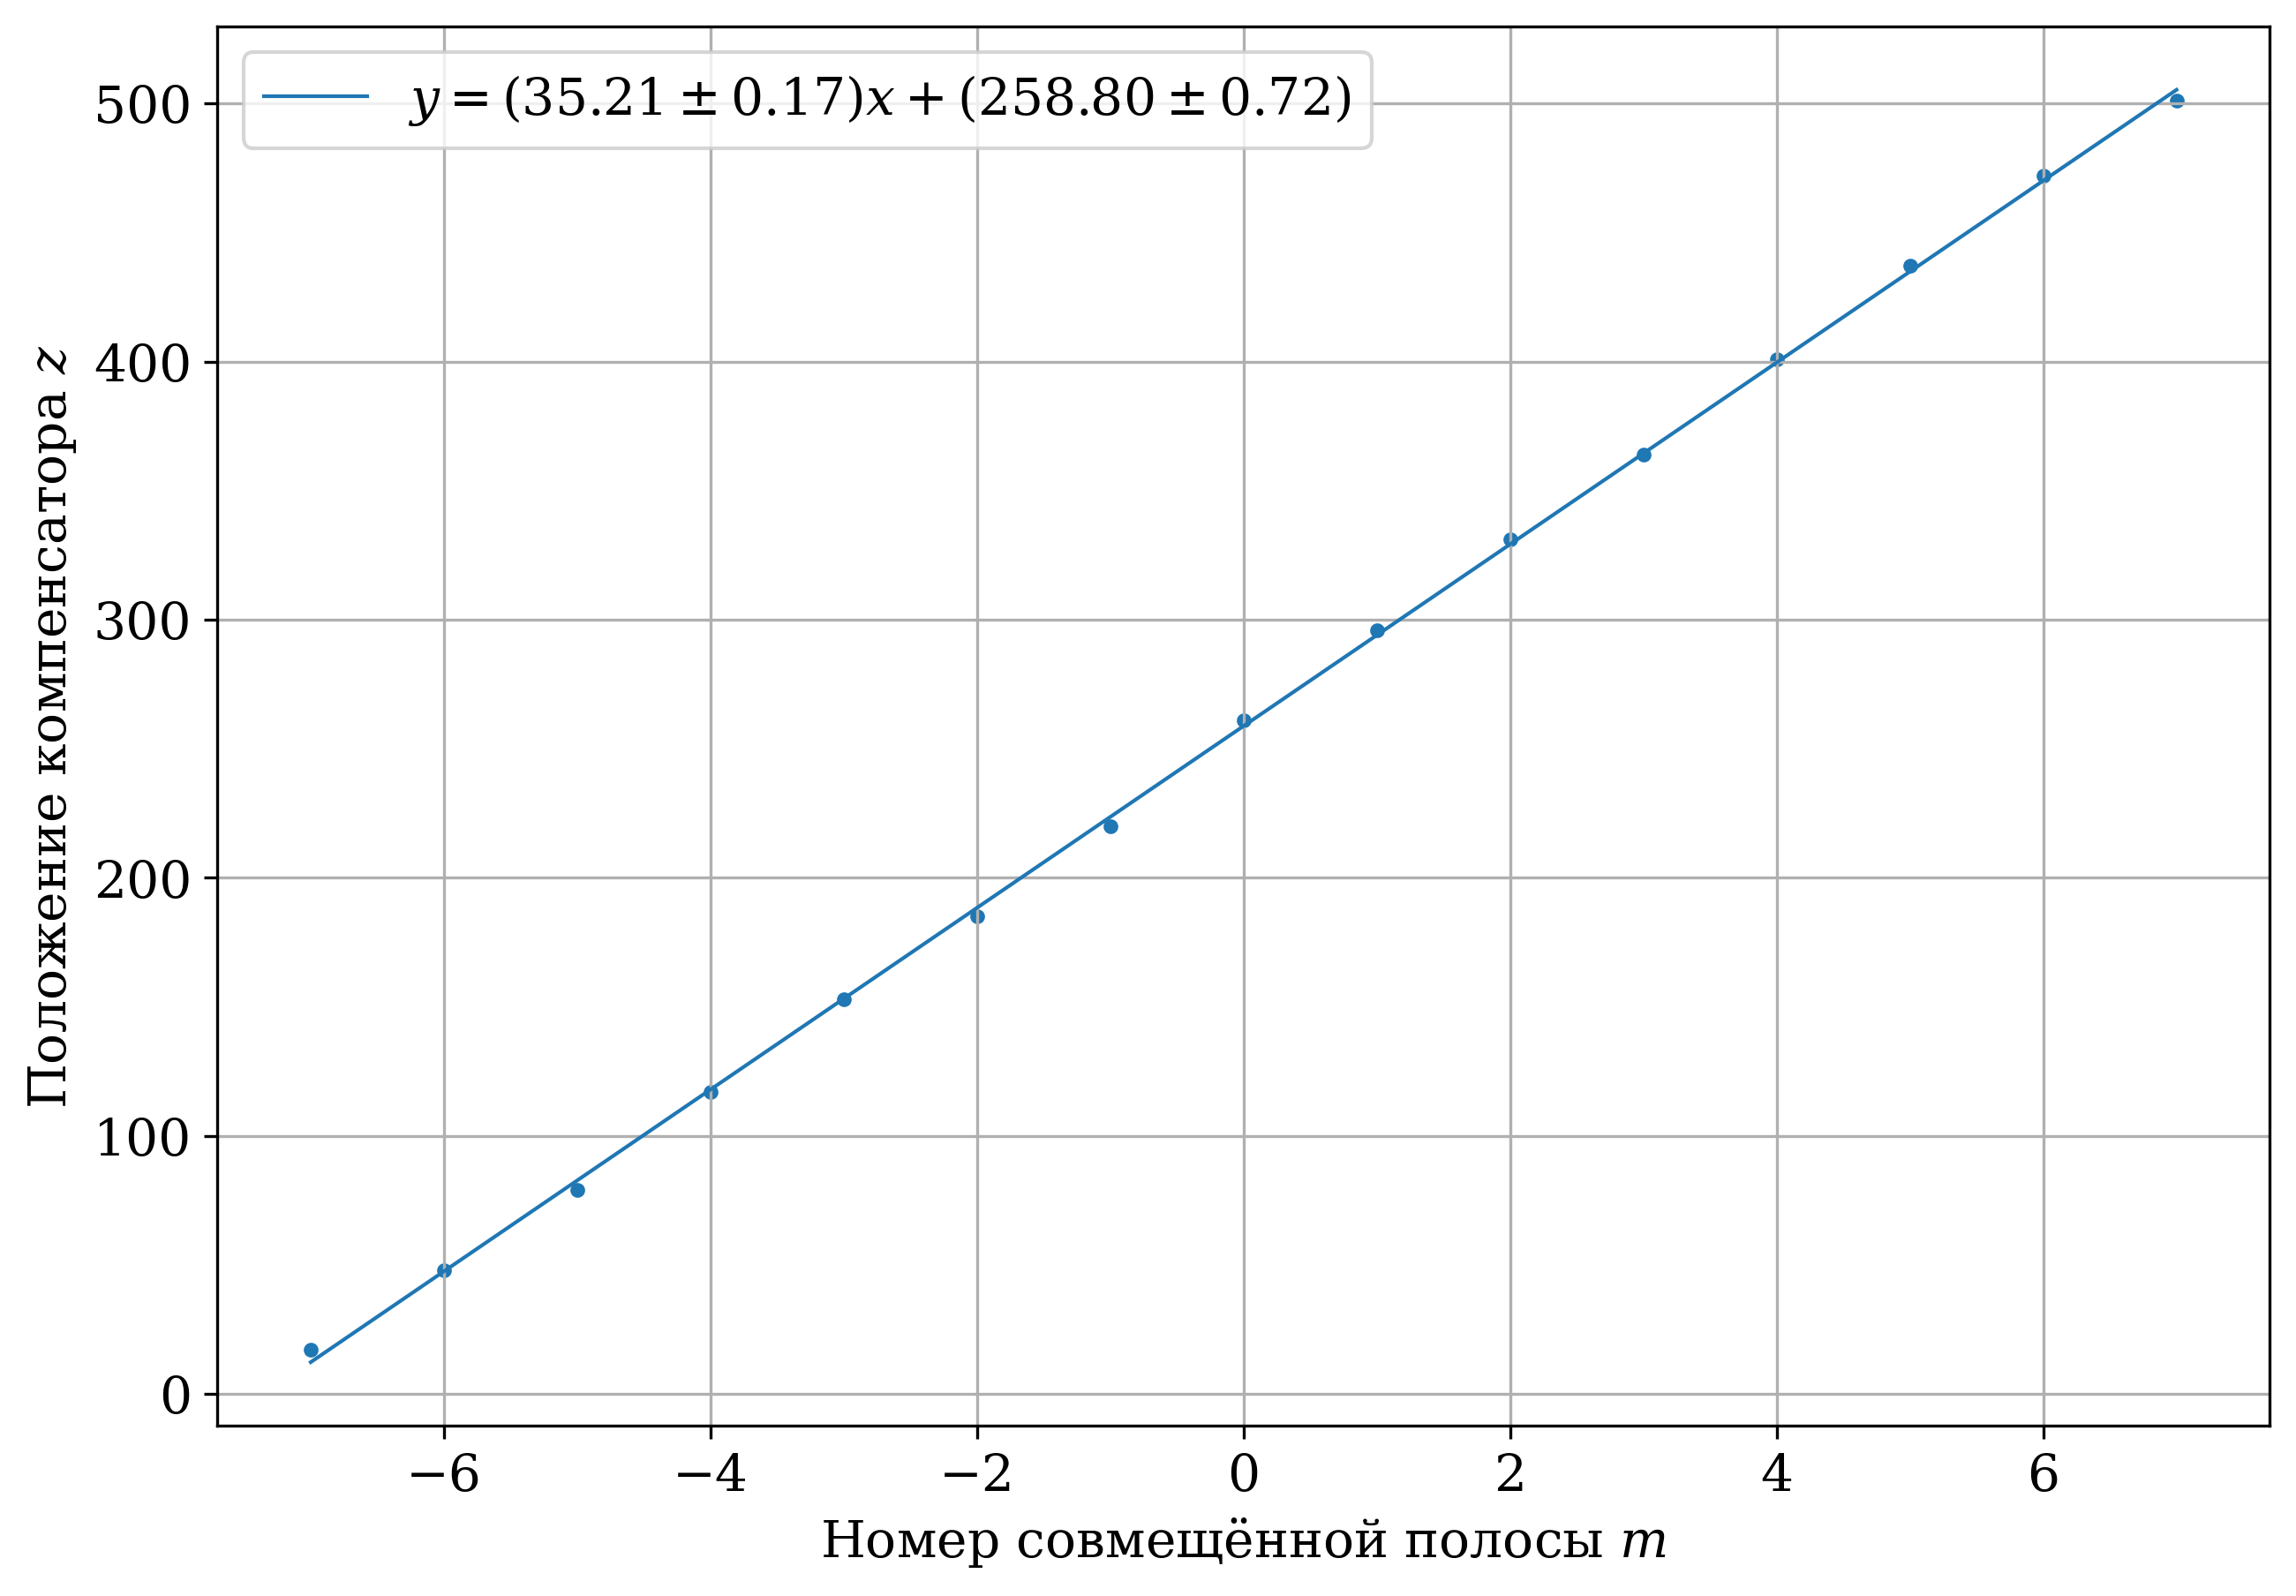

In [13]:
# plt.title("Калибрационный график")
plt.ylabel("Положение компенсатора $z$")
plt.xlabel("Номер совмещённой полосы $m$")

plt.scatter(cal.n, cal.z, marker='.')

args, cov = np.polyfit(cal.n, cal.z, 1, cov=True)
anti_args = np.polyfit(cal.z, cal.n, 1)
calf = np.poly1d(args)
anticalf = np.poly1d(anti_args)
print(*args)
err = np.sqrt(cov.diagonal())
print(*err)
print(np.corrcoef(np.stack((cal.n, cal.z))))

plt.plot(cal.n, calf(cal.n), label=r"$y = ({:.2f} \pm {:.2f}) x + ({:.2f} \pm {:.2f})$".format(args[0], err[0], args[1], err[1]), lw=1)


plt.legend()
plt.savefig('plot1.png')

## Зависимость от даления

In [14]:
with open('pressure.csv') as f:
    pres = pd.read_csv(f)
    

pres.sort_values("p", inplace=True)
pres.reset_index(inplace=True)
pres.drop(columns='index', inplace=True)
pres['m'] = anticalf(pres["z"])
pres['n'] = pres['m'] * 670e-9 / 0.25
print(r'$\Delta P$, мм вод.ст.', *pres.p[:10], sep=' & ', end="\\\\\n\\hline\n")
print(r'$\Delta P$, Па', *map(int, pres.p[:10] * 9.8), sep=' & ', end="\\\\\n\\hline\n")
print(r'$z$', *pres.z[:10], sep=' & ', end="\\\\\n\\hline\n")
print(r'$n \cdot 10^6$', *round(pres.n[:10]*1e6, 2), sep=' & ', end="\\\\\n\\hline\n")
print(r'$\Delta P$, мм вод.ст.', *pres.p[10:], sep=' & ', end="\\\\\n\\hline\n")
print(r'$\Delta P$, Па', *map(int, pres.p[10:] * 9.8), sep=' & ', end="\\\\\n\\hline\n")
print(r'$z$', *pres.z[10:], sep=' & ', end="\\\\\n\\hline\n")
print(r'$n \cdot 10^6$', *round(pres.n[10:]*1e6, 2), sep=' & ', end="\\\\\n\\hline\n")

pres.p *= 9.8

$\Delta P$, мм вод.ст. & -1000 & -900 & -800 & -700 & -600 & -500 & -400 & -300 & -200 & -100\\
\hline
$\Delta P$, Па & -9800 & -8820 & -7840 & -6860 & -5880 & -4900 & -3920 & -2940 & -1960 & -980\\
\hline
$z$ & 632 & 577 & 540 & 500 & 457 & 422 & 386 & 356 & 322 & 281\\
\hline
$n \cdot 10^6$ & 28.4 & 24.21 & 21.4 & 18.35 & 15.08 & 12.42 & 9.68 & 7.4 & 4.81 & 1.69\\
\hline
$\Delta P$, мм вод.ст. & 100 & 200 & 300 & 400 & 500 & 600 & 700 & 800 & 900 & 1000\\
\hline
$\Delta P$, Па & 980 & 1960 & 2940 & 3920 & 4900 & 5880 & 6860 & 7840 & 8820 & 9800\\
\hline
$z$ & 210 & 182 & 150 & 116 & 90 & 46 & 9 & -26 & -54 & -100\\
\hline
$n \cdot 10^6$ & -3.71 & -5.84 & -8.28 & -10.87 & -12.84 & -16.19 & -19.01 & -21.67 & -23.8 & -27.3\\
\hline


[[ 1.         -0.99929778]
 [-0.99929778  1.        ]]
-2.706163353464947e-09 -4.1915633306351253e-07
1.7863677190144502e-11 1.0395790974721473e-07


array([ 2.83971036e-05,  2.42121070e-05,  2.13967458e-05,  1.83531119e-05,
        1.50812056e-05,  1.24180260e-05,  9.67875555e-06,  7.39603019e-06,
        4.80894144e-06,  1.68921677e-06, -3.71323326e-06, -5.84377694e-06,
       -8.27868399e-06, -1.08657727e-05, -1.28441347e-05, -1.61921319e-05,
       -1.90074932e-05, -2.16706728e-05, -2.38012165e-05, -2.73013954e-05])

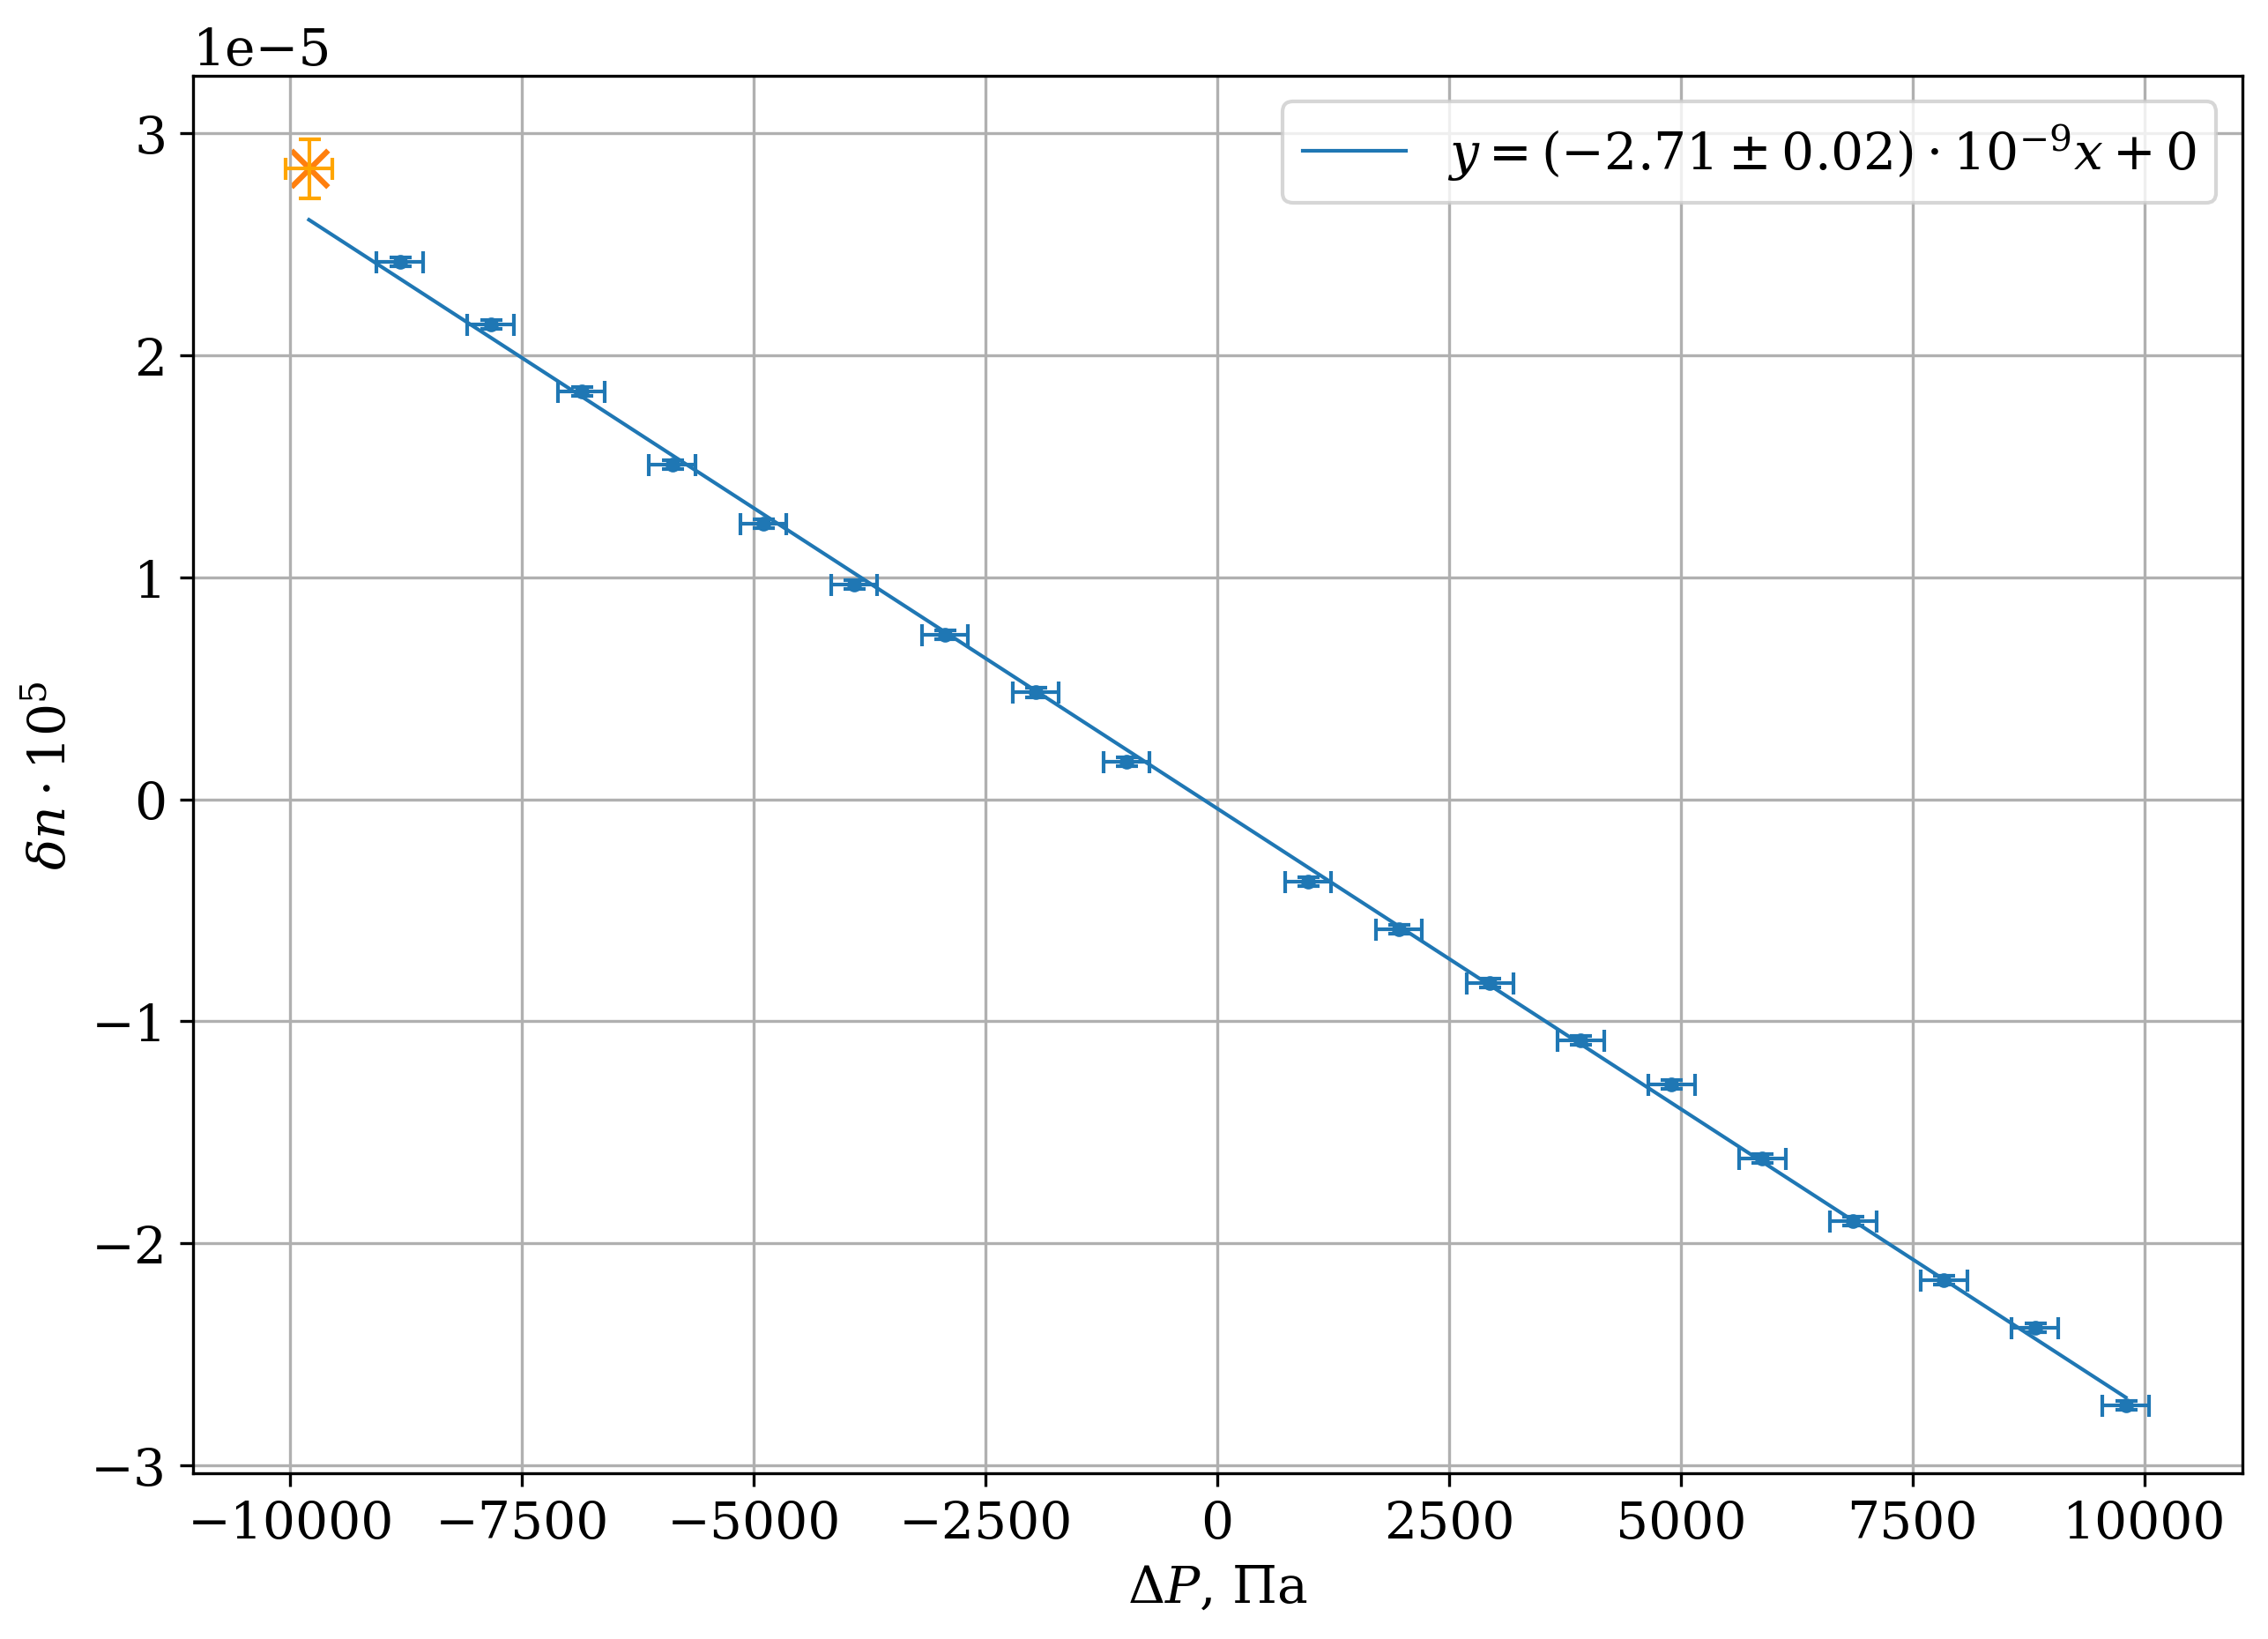

In [15]:
plt.xlabel(r'$\Delta P$, Па')
plt.ylabel(r'$\delta n \cdot 10^5$')

plt.errorbar(pres.p[1:], pres.n[1:], 100e-9 / 0.5, 250, 'none', lw=1, capsize=3)
plt.errorbar(pres.p[0], pres.n[0], 670e-9 / 0.5, 250, 'none', lw=1, ecolor='orange', capsize=3)
plt.scatter(pres.p[1:], pres.n[1:], marker='.')
plt.scatter(pres.p[0], pres.n[0], marker='x', s=100)
print(np.corrcoef(np.stack((pres.p, pres.n))))

args, cov = np.polyfit(pres.p[1:], pres.n[1:], 1, cov=True)
err = np.sqrt(cov.diagonal())
presf = np.poly1d(args)
print(*args)
print(*np.sqrt(cov.diagonal()))

plt.plot(pres.p, presf(pres.p), 
         label=r"$y = ({:.2f} \pm {:.2f}) \cdot 10^{} x + 0$".format(
             args[0]*1e9, err[0]*1e9, '{-9}', args[1], err[1]), lw=1)

plt.legend()
plt.savefig('plot2.png')

y = pres.n.to_numpy()
y

In [21]:
pres.to_json()

'{"p":{"0":-9800.0,"1":-8820.0,"2":-7840.0,"3":-6860.0,"4":-5880.0,"5":-4900.0,"6":-3920.0,"7":-2940.0,"8":-1960.0,"9":-980.0,"10":980.0,"11":1960.0,"12":2940.0,"13":3920.0,"14":4900.0,"15":5880.0,"16":6860.0,"17":7840.0,"18":8820.0,"19":9800.0},"z":{"0":632,"1":577,"2":540,"3":500,"4":457,"5":422,"6":386,"7":356,"8":322,"9":281,"10":210,"11":182,"12":150,"13":116,"14":90,"15":46,"16":9,"17":-26,"18":-54,"19":-100},"m":{"0":10.5959341605,"1":9.0343683008,"2":7.9838603589,"3":6.8481760973,"4":5.6273155161,"5":4.6335917872,"6":3.6114759518,"7":2.7597127556,"8":1.7943811333,"9":0.6303047652,"10":-1.3855347991,"11":-2.1805137822,"12":-3.0890611915,"13":-4.0543928138,"14":-4.7925875838,"15":-6.0418402716,"16":-7.0923482135,"17":-8.0860719424,"18":-8.8810509255,"19":-10.1870878263},"n":{"0":0.0000283971,"1":0.0000242121,"2":0.0000213967,"3":0.0000183531,"4":0.0000150812,"5":0.000012418,"6":0.0000096788,"7":0.000007396,"8":0.0000048089,"9":0.0000016892,"10":-0.0000037132,"11":-0.0000058438,"1

# Зависисмость от времени

In [7]:
with open('gas_t.csv') as f:
    gas = pd.read_csv(f)
    
gas["n"] = anticalf(gas.z) * 632.8 * 1e-9 / 0.25
# plt.tlot(gas.t[1:], (gas.z[1:].to_numpy() - gas.z[:-1].to_numpy()) / (gas.t[1:].to_numpy() - gas.t[:-1].to_numpy()))
print(r'$t$, с', *gas.t[:7], sep=' & ', end="\\\\\n\\hline\n")
print(r'$z$', *gas.z[:7], sep=' & ', end="\\\\\n\\hline\n")
print(r'$\delta n \cdot 10^6$', *round(gas.n[:7]*1e6, 2), sep=' & ', end="\\\\\n\\hline\n")
print(r'$t$, с', *gas.t[7:14], sep=' & ', end="\\\\\n\\hline\n")
print(r'$z$', *gas.z[7:14], sep=' & ', end="\\\\\n\\hline\n")
print(r'$\delta n \cdot 10^6$', *round(gas.n[7:14]*1e6, 2), sep=' & ', end="\\\\\n\\hline\n")
print(r'$t$, с', *gas.t[14:], sep=' & ', end="\\\\\n\\hline\n")
print(r'$z$', *gas.z[14:], sep=' & ', end="\\\\\n\\hline\n")
print(r'$\delta n \cdot 10^6$', *round(gas.n[14:]*1e6, 2), sep=' & ', end="\\\\\n\\hline\n")


$t$, с & 0 & 65 & 120 & 180 & 240 & 300 & 360\\
\hline
$z$ & 2497 & 2215 & 2090 & 2022 & 1990 & 1803 & 1720\\
\hline
$\delta n \cdot 10^6$ & 160.85 & 140.58 & 131.6 & 126.71 & 124.41 & 110.98 & 105.01\\
\hline
$t$, с & 420 & 480 & 540 & 600 & 660 & 720 & 780\\
\hline
$z$ & 1651 & 1586 & 1515 & 1468 & 1415 & 1362 & 1289\\
\hline
$\delta n \cdot 10^6$ & 100.05 & 95.38 & 90.28 & 86.9 & 83.09 & 79.28 & 74.04\\
\hline
$t$, с & 840 & 900 & 965 & 1025 & 1080 & 1140 & 1211\\
\hline
$z$ & 1243 & 1241 & 1198 & 1164 & 1130 & 1100 & 1058\\
\hline
$\delta n \cdot 10^6$ & 70.73 & 70.59 & 67.5 & 65.05 & 62.61 & 60.45 & 57.44\\
\hline


In [8]:
D = anticalf(gas.z[0]) * 632.8 * 1e-9
n = D/0.25
D, n
gas

,t,z,n
0,0,2497,0.000161
1,65,2215,0.000141
2,120,2090,0.000132
3,180,2022,0.000127
4,240,1990,0.000124
5,300,1803,0.000111
6,360,1720,0.000105
7,420,1651,0.000100
8,480,1586,0.000095
9,540,1515,0.000090


/home/coastal/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


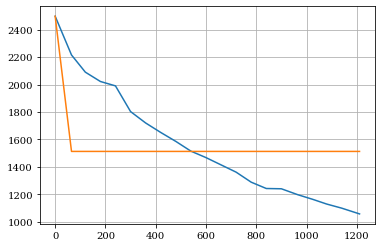

In [9]:
plt.plot(gas.t, gas.z)

def expfit(x, a, b, c):
    return a * np.exp(-b*x) + c

val = curve_fit(expfit, gas.t, gas.z)
plt.plot(gas.t, expfit(gas.t, val[0][0], val[0][1], val[0][2]))